In [22]:
 !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py

--2024-03-08 10:51:43--  https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1629 (1.6K) [text/plain]
Saving to: ‘python_environment_check.py.1’

python_environment_ 100%[===================>]   1.59K  --.-KB/s    in 0s      

2024-03-08 10:51:43 (22.5 MB/s) - ‘python_environment_check.py.1’ saved [1629/1629]



In [23]:
from IPython.display import Image

분류알고리즘

In [24]:
from sklearn import datasets
import numpy as np

In [25]:
#  0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print(f"클래스 레이블 : {np.unique(y)}")


클래스 레이블 : [0 1 2]


데이터 분류
  - 훈련용 : 70, 테스트 : 30

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [27]:
print(f"y label count : {np.bincount(y)}")
print(f"y_train label count : {np.bincount(y_train)}")
print(f"y_test label count : {np.bincount(y_test)}")

y label count : [50 50 50]
y_train label count : [35 35 35]
y_test label count : [15 15 15]


특성 표준화

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

사이킷런 : 퍼셉트론 훈련

In [29]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [30]:
y_pred = ppn.predict(X_test_std)
print(f"잘못분류된 샘플 개수 : {(y_pred != y_test).sum()}")

잘못분류된 샘플 개수 : 1


In [31]:
from sklearn.metrics import accuracy_score
print(f"정확도 : {accuracy_score(y_test,y_pred)}")

정확도 : 0.9777777777777777


In [32]:
ppn.score(X_test_std,y_test)

0.9777777777777777

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 맷플롯립 호환성을 체크합니다
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

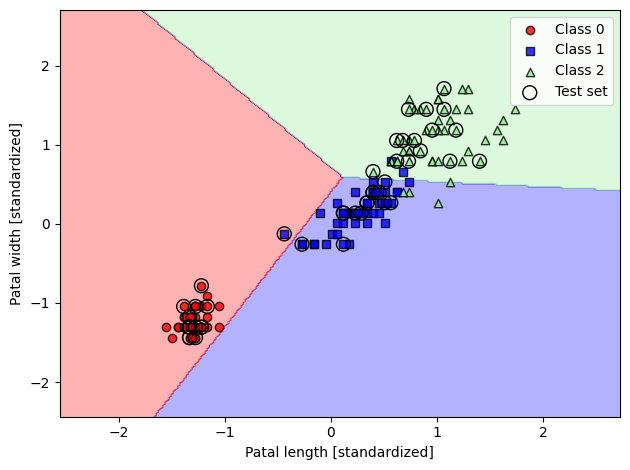

In [34]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx = range(105,150))
plt.xlabel('Patal length [standardized]')
plt.ylabel('Patal width [standardized]')
plt.legend()
plt.tight_layout()
plt.show()

로지스틱 회귀를 사용한 클래스 확률 모델링

In [35]:
import matplotlib.pyplot as plt
import numpy as np

시그모이드 함수

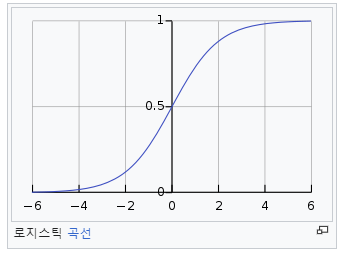

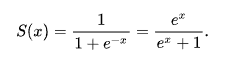

In [36]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

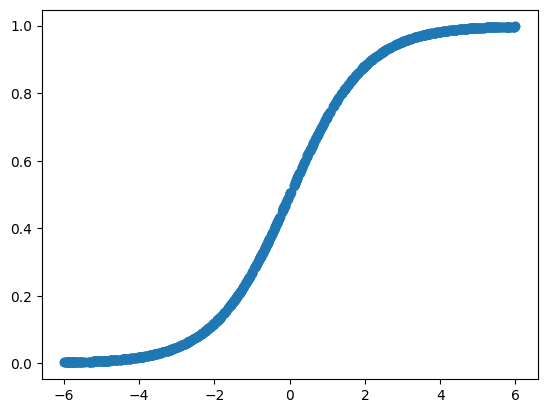

In [42]:
x = np.random.uniform(-6,6,size=1000)
y = sigmoid(x)
plt.scatter(x,y)
plt.show()

In [43]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_03.png', width=500)

In [44]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_25.png', width=500)

로지스틱 손실 함수의 가중치 학습

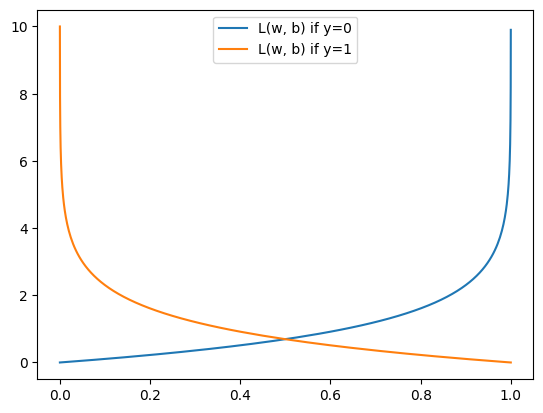

In [46]:
def loss_1(x):
  return -np.log(sigmoid(x))

def loss_0(x):
  return -np.log(1 - sigmoid(x))

z = np.arange(-10,10, 0.1)
sigma_z = sigmoid(z)

c0 = [loss_0(x) for x in z]
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c0, label = 'L(w, b) if y=0')
plt.plot(sigma_z, c1, label = 'L(w, b) if y=1')
plt.legend()
plt.show()


In [48]:
# 아달린 -> 로지스틱 회귀 변경

In [72]:
class LogisticRegressionGD:
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    b_ : 스칼라
      학습된 절편 유닛
    losses_ : list
      각 에포크의 로지스틱 손실 함수 값

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

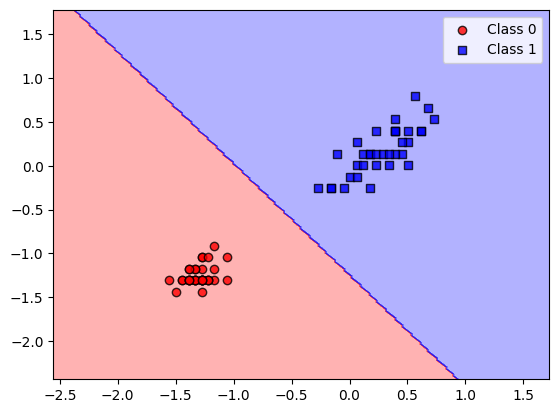

In [75]:
X_train_01_subset = X_train_std[  (y_train==0) | (y_train ==1)   ]
y_train_01_subset = y_train[  (y_train==0) | (y_train ==1)   ]

X_train_01_subset.shape, y_train_01_subset.shape
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset,classifier=lrgd)
plt.legend()
plt.show()


사이킷런으로 구현된 로지스틱 회귀모델

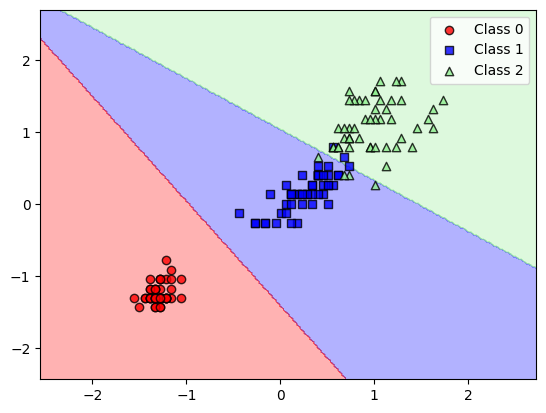

In [76]:
from sklearn.linear_model import LogisticRegression
# X_combined_std, y_combined
# 학습
# plot_decision_regions
# plt.legend()
# plt.show()
lr = LogisticRegression()
lr.fit(X_combined_std,y_combined)
plot_decision_regions(X_combined_std,y_combined,lr)
plt.legend()
plt.show()


과적합
  - 규제를 사용해서 과적합 해결

In [77]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_07.png', width=700)

In [79]:
# 서포트 벡터 머신을 사용한 최대 마진 분류
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch03/figures/03_09.png', width=700)

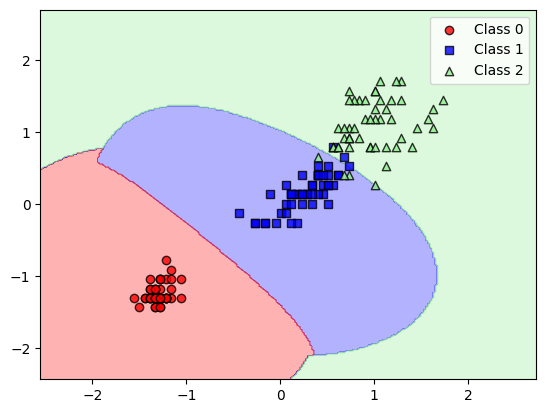

In [81]:
# 서포트 벡터 SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_combined_std,y_combined)
plot_decision_regions(X_combined_std,y_combined,svc)
plt.legend()
plt.show()